# Diseño de una Montaña Rusa

![Imagen de la montaña rusa](src/mtn_r.jpg)


### Import de datos del CSV

In [ ]:
import csv

with open('data.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        print(row)

## Paso 1

[-146.666666666667*x**3 + 44.0*x**2 + 0.566666666666666*x + 1.1, 283.333333333333*x**3 - 214.0*x**2 + 52.1666666666667*x - 2.34, -136.666666666667*x**3 + 164.0*x**2 - 61.2333333333333*x + 9.0]
Polinomios por tramos: 
 x = [0.1,0.2]
-146.666666666667*x**3 + 44.0*x**2 + 0.566666666666666*x + 1.1
 x = [0.2,0.3]
283.333333333333*x**3 - 214.0*x**2 + 52.1666666666667*x - 2.34
 x = [0.3,0.4]
-136.666666666667*x**3 + 164.0*x**2 - 61.2333333333333*x + 9.0


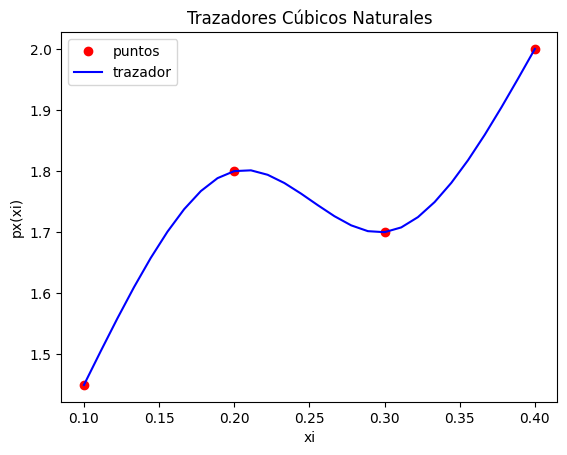

In [14]:
#Julio

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def trazador_cubico(xi,yi):
    n = len(xi)
    
    #Se crea un array dife que almacena las diferencias entre valores x consecutivos.
    #Esto se usa para calcular los intervalos entre puntos.
    dife = np.zeros(n-1, dtype = float)
    for j in range(n-1):
        dife[j] = xi[j+1] - xi[j]
    
    # Sistema de ecuaciones
    m_A = np.zeros(shape=(n-2,n-2), dtype = float)
    m_B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    m_A[0,0] = 2*(dife[0]+dife[1])
    m_A[0,1] = dife[1]
    m_B[0] = 6*((yi[2]-yi[1])/dife[1] - (yi[1]-yi[0])/dife[0])

    for i in range(1,n-3):
        m_A[i,i-1] = dife[i]
        m_A[i,i] = 2*(dife[i]+dife[i+1])
        m_A[i,i+1] = dife[i+1]
        #representa la diferencia dividida entre los puntos (i+2) e (i+1) y (i+1) e i
        dd_21 = (yi[i+2]-yi[i+1])/dife[i+1]
        dd_10 = (yi[i+1]-yi[i])/dife[i]
        
        m_B[i] = 6*(dd_21 - dd_10)
        
    m_A[n-3,n-4] = dife[n-3]
    m_A[n-3,n-3] = 2*(dife[n-3]+dife[n-2])
    dd_12 = (yi[n-1]-yi[n-2])/dife[n-2]
    dd_23 = (yi[n-2]-yi[n-3])/dife[n-3]
    m_B[n-3] = 6*(dd_12 - dd_23)
    
    # Resolver sistema de ecuaciones S
    r = np.linalg.solve(m_A,m_B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0
    
    # Coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*dife[j])
        b[j] = S[j]/2
        dd_10 = (yi[j+1]-yi[j])/dife[j]
        c[j] = dd_10 - (2*dife[j]*S[j]+dife[j]*S[j+1])/6
        d[j] = yi[j]
    
    # Polinomio trazador
    x = sym.Symbol('x')
    tabla = []
    for j in range(0,n-1,1):

        tramox = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2 + c[j]*(x-xi[j])+ d[j]
        
        tramox = tramox.expand()
        tabla.append(tramox)
    print(tabla)
    return(tabla)

# PROGRAMA -----------------------
# INGRESO , Datos de prueba
xi = np.array([0.1 , 0.2, 0.3, 0.4])
fi = np.array([1.45, 1.8, 1.7, 2.0])
muestras = 10 # entre cada par de puntos

# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(xi)
tabla = trazador_cubico(xi,fi)

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(tabla[tramo-1]))

# GRAFICA
# Puntos para graficar cada tramo
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)
    
    # evalua polinomio del tramo
    tramox = tabla[tramo-1]
    pxt = sym.lambdify('x',tramox)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(xi,fi,'ro', label='puntos')
plt.plot(xtraza,ytraza, label='trazador', color='blue')
plt.title('Trazadores Cúbicos Naturales')
plt.xlabel('xi')
plt.ylabel('px(xi)')
plt.legend()
plt.show()


## Paso 2

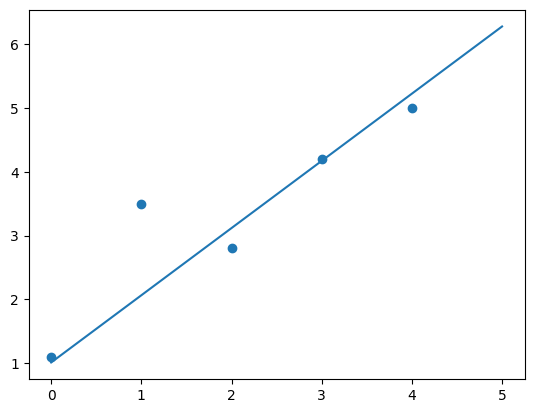

In [15]:
#Jose
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

#Valores momentaneos
x_data=np.array([0,1,2,3,4])
y_data=np.array([1.1, 3.5, 2.8, 4.2, 5.0])

#Valores para graficar la curva
x_vals=np.linspace(0,5,100)

#Inicializacion de arrays
xy_data=x_data*y_data #Multiplicacion de arrays
x_squared=np.square(x_data) #Eleva al cuadrado los valores de x

sumastorias=np.zeros(4)

#Calculo de las sumatorias
sumastorias[0]=np.sum(y_data)
sumastorias[1]=np.sum(x_data)
sumastorias[2]=np.sum(xy_data)
sumastorias[3]=np.sum(x_squared)

#Calculo de la pendiente
m=(6*sumastorias[2]-sumastorias[1]*sumastorias[0])/(6*sumastorias[3]-sumastorias[1]**2)
#Calculo de la ordenada al origen
b=(sumastorias[0]-m*sumastorias[1])/6
#cálculo de la recta
y_vals=m*x_vals+b

#Graficar
plt.plot(x_vals,y_vals)
plt.scatter(x_data,y_data)
plt.show()



## Paso 3

In [17]:
#Luis